In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Navigate to the data folder - SIMPLE PATH now!
data_path = '5G_Measurements_Raw_Dataset/02-5GCA-rawdata/Minneapolis_Apr_2023/drive/'

# Check if the path exists
if os.path.exists(data_path):
    print("✅ Data folder found!")
    
    # List all CSV files
    csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
    print(f"\nFound {len(csv_files)} CSV files:")
    for i, file in enumerate(csv_files[:10]):  # Show first 10
        print(f"{i+1}. {file}")
    
    if len(csv_files) > 10:
        print(f"... and {len(csv_files) - 10} more files")
    
    # Load the first one
    if csv_files:
        first_file = csv_files[0]
        print(f"\n{'='*60}")
        print(f"Loading: {first_file}")
        print('='*60)
        
        data = pd.read_csv(os.path.join(data_path, first_file))
        
        print("\n📊 Dataset Info:")
        print(f"Rows: {data.shape[0]:,}")
        print(f"Columns: {data.shape[1]}")
        
        print("\n📋 Column names:")
        for col in data.columns:
            print(f"  - {col}")
        
        print("\n👀 First 3 rows:")
        print(data.head(3))
        
        print("\n📈 Data types:")
        print(data.dtypes)
        
        print("\n📊 Basic statistics:")
        print(data.describe())
else:
    print("❌ Data folder not found!")
    print("Make sure you put 5G_Measurements_Raw_Dataset in your 5G_Project folder")


✅ Data folder found!

Found 2 CSV files:
1. MPLS-DRIVE-APRIL-DOWNTOWN-DL-NSA-M2.csv
2. MPLS-DRIVE-APRIL-DOWNTOWN-DL-SA-M1.csv

Loading: MPLS-DRIVE-APRIL-DOWNTOWN-DL-NSA-M2.csv

📊 Dataset Info:
Rows: 5,165
Columns: 324

📋 Column names:
  - TIME_STAMP
  - Lon
  - Lat
  - API GPS Info GPS_Lon
  - API GPS Info GPS_Lat
  - API GPS Info Speed
  - API GPS Info Estimated accuracy
  - Smart Phone Android System Info Operator
  - Event Technology
  - Event Technology(Band)
  - Smart Phone Smart Throughput Mobile Network DL Throughput [Mbps]
  - Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]
  - LTE KPI CA Type
  - LTE KPI Band Combination
  - LTE KPI PDSCH PRB Number(Avg)(Total)
  - LTE KPI PUSCH PRB Number(Avg)(Total)
  - LTE KPI PDSCH PRB Number(Including 0)(Total)
  - LTE KPI PUSCH PRB Number(Including 0)(Total)
  - LTE KPI PDSCH BLER[%]
  - LTE KPI PUSCH BLER[%]
  - LTE KPI PDSCH Throughput[Mbps]
  - LTE KPI PUSCH Throughput[Mbps]
  - LTE KPI MAC DL Throughput[Mbps]
  - LTE

In [6]:
import pandas as pd
import os

# Load the data
data_path = '5G_Measurements_Raw_Dataset/02-5GCA-rawdata/Minneapolis_Apr_2023/drive/'
first_file = 'MPLS-DRIVE-APRIL-DOWNTOWN-DL-NSA-M2.csv'
data = pd.read_csv(os.path.join(data_path, first_file))

print("🔍 Searching for key columns...\n")

# Look for throughput/speed columns
print("=" * 60)
print("📡 THROUGHPUT/SPEED COLUMNS:")
print("=" * 60)
throughput_keywords = ['throughput', 'speed', 'rate', 'mbps', 'dl', 'download', 'kbps']
throughput_cols = [col for col in data.columns if any(k in col.lower() for k in throughput_keywords)]
for col in throughput_cols[:20]:  # Show first 20
    print(f"  • {col}")
if len(throughput_cols) > 20:
    print(f"  ... and {len(throughput_cols) - 20} more")

# Look for location columns
print("\n" + "=" * 60)
print("📍 LOCATION COLUMNS:")
print("=" * 60)
location_keywords = ['lat', 'lon', 'gps', 'location']
location_cols = [col for col in data.columns if any(k in col.lower() for k in location_keywords)]
for col in location_cols[:15]:
    print(f"  • {col}")

# Look for signal/connection columns
print("\n" + "=" * 60)
print("📶 SIGNAL/CONNECTION COLUMNS:")
print("=" * 60)
signal_keywords = ['rsrp', 'rsrq', 'sinr', 'signal', 'cell', 'pci', 'band']
signal_cols = [col for col in data.columns if any(k in col.lower() for k in signal_keywords)]
for col in signal_cols[:20]:
    print(f"  • {col}")
if len(signal_cols) > 20:
    print(f"  ... and {len(signal_cols) - 20} more")

# Check the actual data in key columns
print("\n" + "=" * 60)
print("📊 SAMPLE DATA FROM KEY COLUMNS:")
print("=" * 60)

key_cols = ['TIME_STAMP', 'Lat', 'Lon', 'API GPS Info Speed']
# Add a throughput column if we found any
if throughput_cols:
    key_cols.append(throughput_cols[0])

print(data[key_cols].head(10))

# Check for null values
print("\n" + "=" * 60)
print("🔍 NULL VALUES IN KEY COLUMNS:")
print("=" * 60)
print(data[key_cols].isnull().sum())


🔍 Searching for key columns...

📡 THROUGHPUT/SPEED COLUMNS:
  • API GPS Info Speed
  • Smart Phone Smart Throughput Mobile Network DL Throughput [Mbps]
  • Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]
  • LTE KPI PDSCH Throughput[Mbps]
  • LTE KPI PUSCH Throughput[Mbps]
  • LTE KPI MAC DL Throughput[Mbps]
  • LTE KPI MAC UL Throughput[Mbps]
  • LTE KPI RLC DL Throughput[Mbps]
  • LTE KPI RLC UL Throughput[Mbps]
  • LTE KPI PDCP DL Throughput[Mbps]
  • LTE KPI PDCP UL Throughput[Mbps]
  • LTE KPI PCell Serving EARFCN(DL)
  • LTE KPI PCell Serving BandWidth(DL)
  • LTE KPI PCell WB RI1 Rate
  • LTE KPI PCell WB RI2 Rate
  • LTE KPI PCell WB RI3 Rate
  • LTE KPI PCell WB RI4 Rate
  • LTE KPI PCell DL MCS0
  • LTE KPI PCell DL MCS1
  • LTE KPI PCell DL Modulation0
  ... and 103 more

📍 LOCATION COLUMNS:
  • Lon
  • Lat
  • API GPS Info GPS_Lon
  • API GPS Info GPS_Lat
  • API GPS Info Speed
  • API GPS Info Estimated accuracy
  • LTE KPI PCell DL Modulation0
  • LTE KPI

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("📂 Loading both NSA and SA drive data...\n")

# Load both files
data_path = '5G_Measurements_Raw_Dataset/02-5GCA-rawdata/Minneapolis_Apr_2023/drive/'
file1 = 'MPLS-DRIVE-APRIL-DOWNTOWN-DL-NSA-M2.csv'
file2 = 'MPLS-DRIVE-APRIL-DOWNTOWN-DL-SA-M1.csv'

data_nsa = pd.read_csv(os.path.join(data_path, file1))
data_sa = pd.read_csv(os.path.join(data_path, file2))

# Add deployment type label
data_nsa['deployment_type'] = 'NSA (Non-Standalone)'
data_sa['deployment_type'] = 'SA (Standalone)'

# Combine
data = pd.concat([data_nsa, data_sa], ignore_index=True)

print(f"✅ Combined dataset: {data.shape[0]:,} rows\n")

# Rename columns to something shorter and easier to work with
data = data.rename(columns={
    'Smart Phone Smart Throughput Mobile Network DL Throughput [Mbps]': 'throughput',
    'API GPS Info Speed': 'speed',
    'Lat': 'latitude',
    'Lon': 'longitude',
    'TIME_STAMP': 'timestamp'
})

print("📊 Renamed key columns for easier access:")
print("  • throughput (DL Mbps)")
print("  • speed (GPS speed)")
print("  • latitude")
print("  • longitude")
print("  • timestamp")

# Clean the data
print("\n🧹 Cleaning data...")

# Remove rows where throughput is missing or zero
initial_rows = len(data)
data = data[data['throughput'].notna()]
data = data[data['throughput'] > 0]
print(f"  • Removed {initial_rows - len(data):,} rows with missing/zero throughput")

# Remove rows with invalid GPS coordinates
data = data[data['latitude'].notna()]
data = data[data['longitude'].notna()]
print(f"  • Final dataset: {len(data):,} rows")

# Basic statistics
print("\n📈 Throughput Statistics:")
print(f"  • Mean: {data['throughput'].mean():.2f} Mbps")
print(f"  • Median: {data['throughput'].median():.2f} Mbps")
print(f"  • Std Dev: {data['throughput'].std():.2f} Mbps")
print(f"  • Min: {data['throughput'].min():.2f} Mbps")
print(f"  • Max: {data['throughput'].max():.2f} Mbps")

print("\n📍 Geographic Coverage:")
print(f"  • Latitude range: {data['latitude'].min():.5f} to {data['latitude'].max():.5f}")
print(f"  • Longitude range: {data['longitude'].min():.5f} to {data['longitude'].max():.5f}")

print("\n🚗 Speed Statistics:")
print(f"  • Mean speed: {data['speed'].mean():.2f} m/s ({data['speed'].mean() * 3.6:.2f} km/h)")
print(f"  • Max speed: {data['speed'].max():.2f} m/s ({data['speed'].max() * 3.6:.2f} km/h)")

print("\n✅ Data ready for plotting!")

📂 Loading both NSA and SA drive data...

✅ Combined dataset: 11,042 rows

📊 Renamed key columns for easier access:
  • throughput (DL Mbps)
  • speed (GPS speed)
  • latitude
  • longitude
  • timestamp

🧹 Cleaning data...
  • Removed 1,520 rows with missing/zero throughput
  • Final dataset: 9,512 rows

📈 Throughput Statistics:
  • Mean: 145.46 Mbps
  • Median: 96.31 Mbps
  • Std Dev: 161.85 Mbps
  • Min: 0.00 Mbps
  • Max: 4904.00 Mbps

📍 Geographic Coverage:
  • Latitude range: 4.49701 to 6075.00000
  • Longitude range: -9.32787 to 6075.00000

🚗 Speed Statistics:
  • Mean speed: 2.98 m/s (10.71 km/h)
  • Max speed: 4887.00 m/s (17593.20 km/h)

✅ Data ready for plotting!


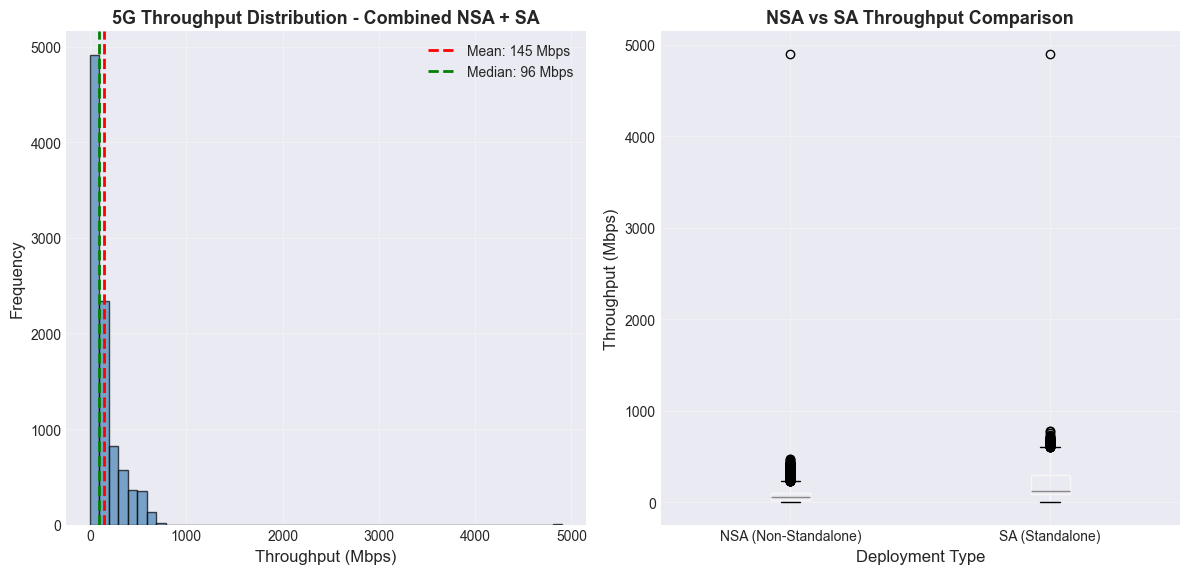

📊 Plot 1 saved: plot1_throughput_distribution.png


In [9]:
# PLOT 1: Throughput Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['throughput'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Throughput (Mbps)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('5G Throughput Distribution - Combined NSA + SA', fontsize=13, fontweight='bold')
plt.axvline(data['throughput'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {data["throughput"].mean():.0f} Mbps')
plt.axvline(data['throughput'].median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: {data["throughput"].median():.0f} Mbps')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
data.boxplot(column='throughput', by='deployment_type', ax=plt.gca())
plt.ylabel('Throughput (Mbps)', fontsize=12)
plt.xlabel('Deployment Type', fontsize=12)
plt.title('NSA vs SA Throughput Comparison', fontsize=13, fontweight='bold')
plt.suptitle('')  # Remove auto title
plt.xticks(rotation=0)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('plot1_throughput_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Plot 1 saved: plot1_throughput_distribution.png")

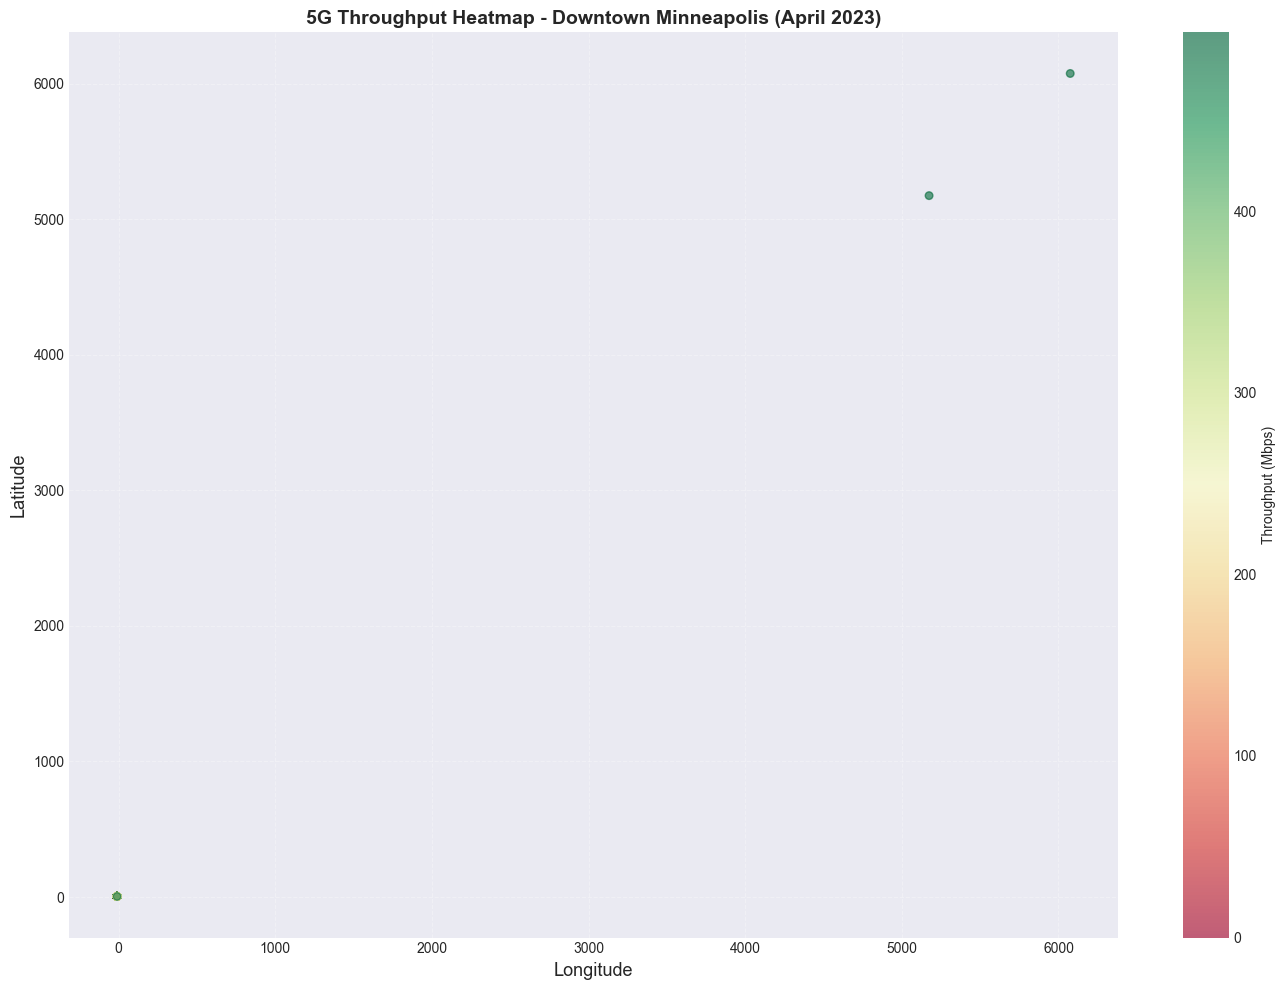

🗺️ Plot 2 saved: plot2_throughput_heatmap.png
Color scale: 0 to 498 Mbps (95th percentile)


In [10]:
# PLOT 2: Geographic Throughput Heatmap
plt.figure(figsize=(14, 10))

# Create the scatter plot
scatter = plt.scatter(data['longitude'], data['latitude'], 
                     c=data['throughput'], 
                     cmap='RdYlGn',  # Red for low, Green for high
                     s=30, 
                     alpha=0.6,
                     vmin=0, 
                     vmax=data['throughput'].quantile(0.95))  # Cap at 95th percentile for better colors

cbar = plt.colorbar(scatter, label='Throughput (Mbps)')
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.title('5G Throughput Heatmap - Downtown Minneapolis (April 2023)', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('plot2_throughput_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("🗺️ Plot 2 saved: plot2_throughput_heatmap.png")
print(f"Color scale: 0 to {data['throughput'].quantile(0.95):.0f} Mbps (95th percentile)")

<Figure size 1200x600 with 0 Axes>

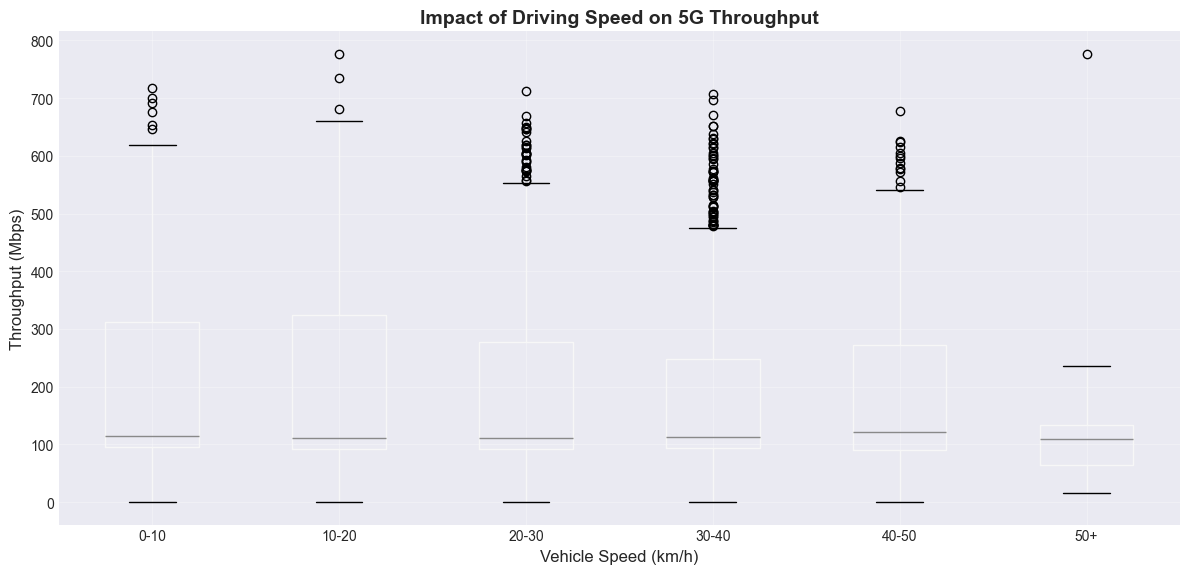

🚗 Plot 3 saved: plot3_speed_impact.png
📊 Correlation between speed and throughput: 0.435


In [11]:
# PLOT 3: Impact of Vehicle Speed on Throughput
# Convert speed from m/s to km/h
data['speed_kmh'] = data['speed'] * 3.6

# Create speed bins
data['speed_bin'] = pd.cut(data['speed_kmh'], 
                            bins=[0, 10, 20, 30, 40, 50, 100],
                            labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])

plt.figure(figsize=(12, 6))
data.boxplot(column='throughput', by='speed_bin', figsize=(12, 6))
plt.xlabel('Vehicle Speed (km/h)', fontsize=12)
plt.ylabel('Throughput (Mbps)', fontsize=12)
plt.title('Impact of Driving Speed on 5G Throughput', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove auto title
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('plot3_speed_impact.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate correlation
correlation = data['throughput'].corr(data['speed_kmh'])
print(f"🚗 Plot 3 saved: plot3_speed_impact.png")
print(f"📊 Correlation between speed and throughput: {correlation:.3f}")

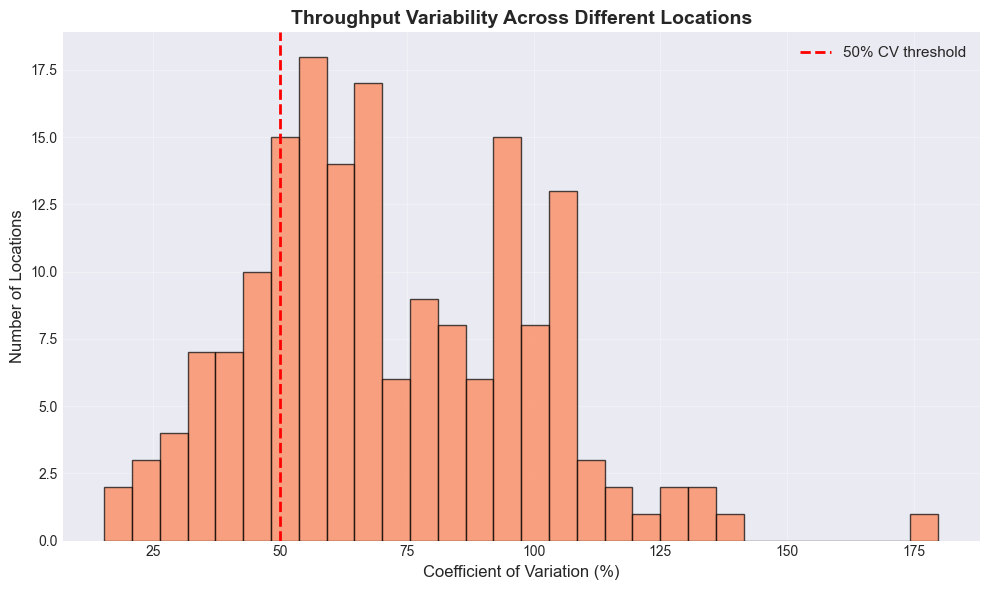

📈 Plot 4 saved: plot4_variability.png
📊 Locations with CV > 50%: 79.3%
   This shows high variability even at the same location!


In [12]:
# PLOT 4: Throughput Variability Across Locations
# Round coordinates to create location bins
data['loc_lat'] = data['latitude'].round(4)
data['loc_lon'] = data['longitude'].round(4)

# Calculate coefficient of variation per location
location_stats = data.groupby(['loc_lat', 'loc_lon'])['throughput'].agg(['mean', 'std', 'count'])
location_stats = location_stats[location_stats['count'] >= 3]  # At least 3 samples
location_stats['cv'] = (location_stats['std'] / location_stats['mean']) * 100

plt.figure(figsize=(10, 6))
plt.hist(location_stats['cv'], bins=30, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Coefficient of Variation (%)', fontsize=12)
plt.ylabel('Number of Locations', fontsize=12)
plt.title('Throughput Variability Across Different Locations', fontsize=14, fontweight='bold')
plt.axvline(50, color='red', linestyle='--', linewidth=2, label='50% CV threshold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('plot4_variability.png', dpi=300, bbox_inches='tight')
plt.show()

high_var_pct = (location_stats['cv'] > 50).sum() / len(location_stats) * 100
print(f"📈 Plot 4 saved: plot4_variability.png")
print(f"📊 Locations with CV > 50%: {high_var_pct:.1f}%")
print(f"   This shows high variability even at the same location!")

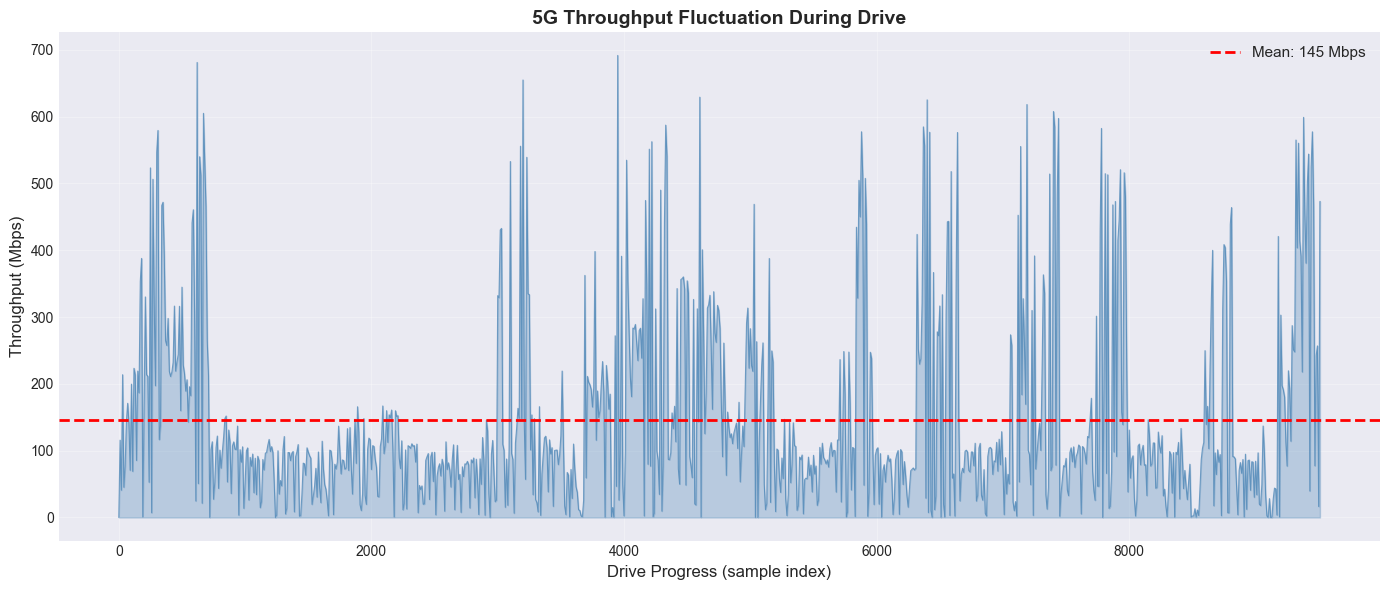

📉 Plot 5 saved: plot5_time_series.png
   Shows wild fluctuations typical of mmWave 5G!


In [13]:
# PLOT 5: Throughput Over Time/Distance
# Create a simple index to represent drive progress
data_sorted = data.sort_values('timestamp').reset_index(drop=True)
data_sorted['sample_index'] = data_sorted.index

# Take a subset for clearer visualization (every 10th point)
plot_data = data_sorted.iloc[::10]

plt.figure(figsize=(14, 6))
plt.plot(plot_data['sample_index'], plot_data['throughput'], 
         linewidth=0.8, alpha=0.7, color='steelblue')
plt.fill_between(plot_data['sample_index'], 0, plot_data['throughput'], 
                 alpha=0.3, color='steelblue')
plt.xlabel('Drive Progress (sample index)', fontsize=12)
plt.ylabel('Throughput (Mbps)', fontsize=12)
plt.title('5G Throughput Fluctuation During Drive', fontsize=14, fontweight='bold')
plt.axhline(data['throughput'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {data["throughput"].mean():.0f} Mbps')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('plot5_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"📉 Plot 5 saved: plot5_time_series.png")
print(f"   Shows wild fluctuations typical of mmWave 5G!")

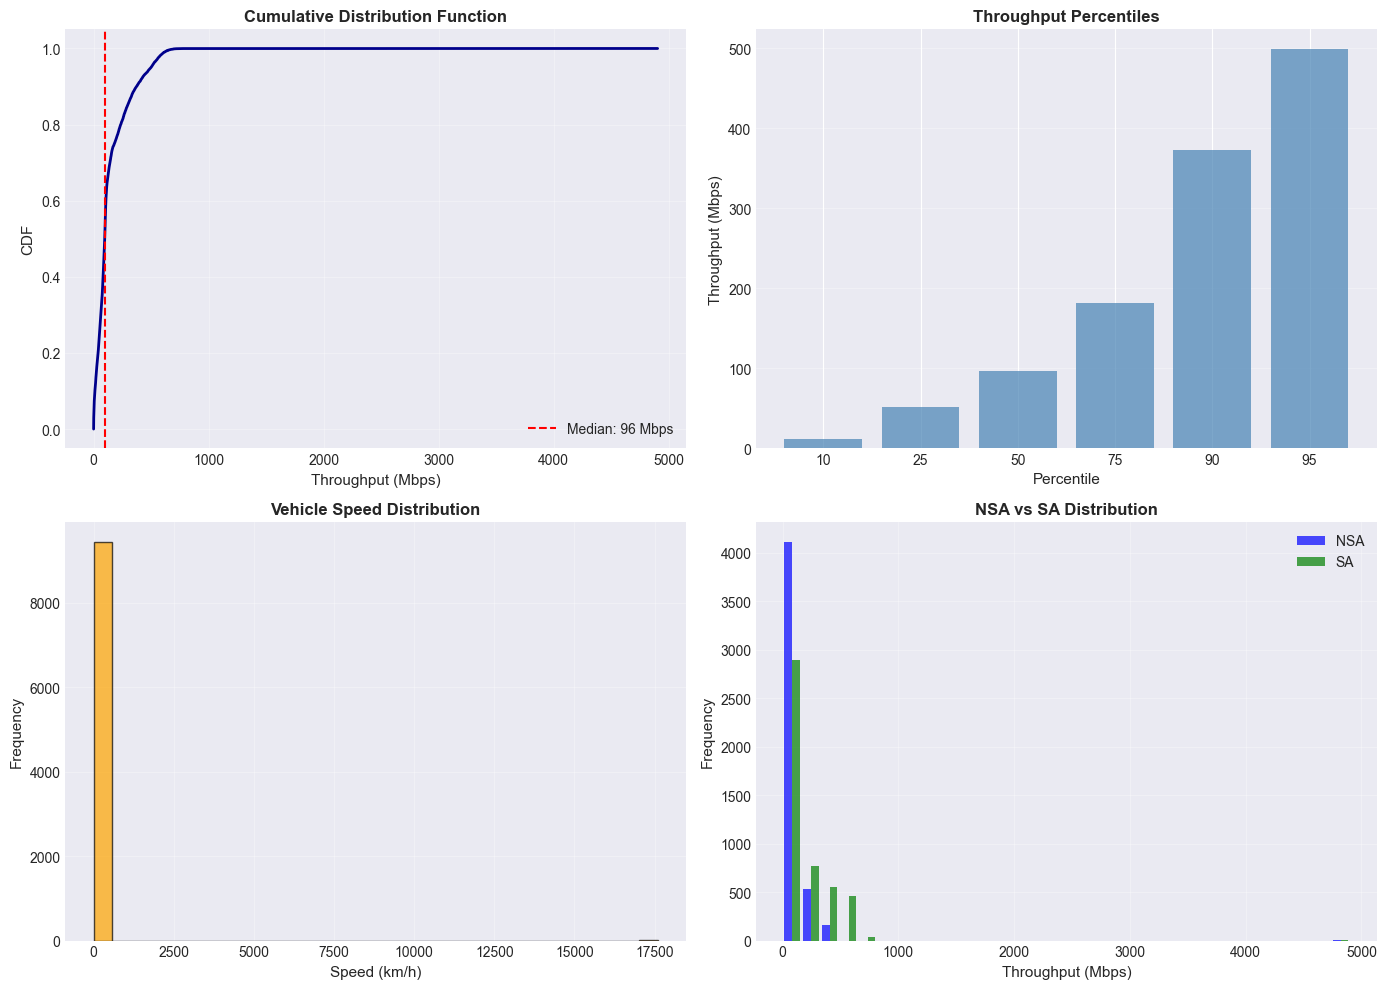

📊 Plot 6 saved: plot6_summary_statistics.png

✅ All plots complete!


In [14]:
# PLOT 6: Multi-panel Summary Statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top-left: CDF of throughput
sorted_throughput = np.sort(data['throughput'])
cdf = np.arange(1, len(sorted_throughput) + 1) / len(sorted_throughput)
axes[0, 0].plot(sorted_throughput, cdf, linewidth=2, color='darkblue')
axes[0, 0].set_xlabel('Throughput (Mbps)', fontsize=11)
axes[0, 0].set_ylabel('CDF', fontsize=11)
axes[0, 0].set_title('Cumulative Distribution Function', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].axvline(data['throughput'].median(), color='red', linestyle='--', 
                   label=f'Median: {data["throughput"].median():.0f} Mbps')
axes[0, 0].legend()

# Top-right: Throughput percentiles
percentiles = [10, 25, 50, 75, 90, 95]
values = [np.percentile(data['throughput'], p) for p in percentiles]
axes[0, 1].bar([str(p) for p in percentiles], values, color='steelblue', alpha=0.7)
axes[0, 1].set_xlabel('Percentile', fontsize=11)
axes[0, 1].set_ylabel('Throughput (Mbps)', fontsize=11)
axes[0, 1].set_title('Throughput Percentiles', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# Bottom-left: Speed distribution
axes[1, 0].hist(data['speed_kmh'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Speed (km/h)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Vehicle Speed Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Bottom-right: NSA vs SA comparison
nsa_data = data[data['deployment_type'] == 'NSA (Non-Standalone)']['throughput']
sa_data = data[data['deployment_type'] == 'SA (Standalone)']['throughput']
axes[1, 1].hist([nsa_data, sa_data], bins=30, label=['NSA', 'SA'], 
                alpha=0.7, color=['blue', 'green'])
axes[1, 1].set_xlabel('Throughput (Mbps)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('NSA vs SA Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('plot6_summary_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"📊 Plot 6 saved: plot6_summary_statistics.png")
print("\n✅ All plots complete!")